In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
TRAIN_PATH = "/content/gdrive/MyDrive/COVID_DATASET/Train"
VAL_PATH = "/content/gdrive/MyDrive/COVID_DATASET/Val"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [ ]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3))) #images are rgb
model.add(Conv2D(64,(3,3),activation='relu')) #increases non-lineraity ('relu') and reduce the number of paramters
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1.0/255,  #normalization leads to early convergence our wrights starts from 0 so reaching 0.0 to 0.XX is easy
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

val_dataset = image.ImageDataGenerator(rescale=1.0/255)
test_dataset = image.ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/COVID_DATASET/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 280 images belonging to 2 classes.


In [ ]:
validation_generator = val_dataset.flow_from_directory(
    '/content/gdrive/MyDrive/COVID_DATASET/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


test_generator = test_dataset.flow_from_directory(
    '/content/gdrive/MyDrive/COVID_DATASET/Test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 80 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=9,
    epochs = 12,
    validation_data = validation_generator,
    validation_steps=3
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/12
9/9 [==============================] - 89s 9s/step - loss: 0.8746 - accuracy: 0.5454 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 2/12
9/9 [==============================] - 10s 1s/step - loss: 0.6267 - accuracy: 0.6263 - val_loss: 0.4884 - val_accuracy: 0.7750
Epoch 3/12
9/9 [==============================] - 10s 1s/step - loss: 0.4356 - accuracy: 0.7995 - val_loss: 0.6073 - val_accuracy: 0.9750
Epoch 4/12
9/9 [==============================] - 10s 1s/step - loss: 0.3826 - accuracy: 0.8816 - val_loss: 0.2011 - val_accuracy: 0.9500
Epoch 5/12
9/9 [==============================] - 10s 1s/step - loss: 0.2342 - accuracy: 0.9123 - val_loss: 0.3014 - val_accuracy: 0.9000
Epoch 6/12
9/9 [==============================] - 10s 1s/step - loss: 0.3031 - accuracy: 0.9069 - val_loss: 0.2068 - val_accuracy: 0.9750
Epoch 7/12
9/9 [==============================] - 10s 1s/step - loss: 0.2091 - accuracy: 0.9446 - val_loss: 0.5009 - val_accuracy: 0.6750
Epoch 8/12
9/9 [==================

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss= hist.history['val_loss']

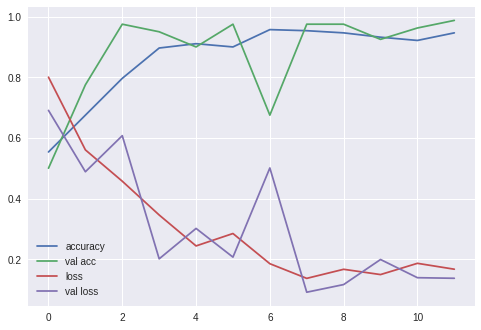

In [ ]:
plt.style.use("seaborn")
plt.plot(acc,label="accuracy")
plt.plot(val_acc,label="val acc")
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(train_generator)
model.evaluate(validation_generator)


3/3 [==============================] - 1s 390ms/step - loss: 0.1370 - accuracy: 0.9875


[0.13700759410858154, 0.987500011920929]

In [ ]:
model.evaluate(test_generator)

1/1 [==============================] - 1s 574ms/step - loss: 0.1678 - accuracy: 0.9688


[0.16775977611541748, 0.96875]

In [ ]:
model.save("model_adv.h5")